In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

# Read the dataset
data = pd.read_csv("fraudTrain.csv")
data = data.drop(0)

print(data.columns)
print(data)



Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')
         Unnamed: 0 trans_date_trans_time        cc_num  \
1                 1              1/1/2019  6.304230e+11   
2                 2              1/1/2019  3.885950e+13   
3                 3              1/1/2019  3.534090e+15   
4                 4              1/1/2019  3.755340e+14   
5                 5              1/1/2019  4.767270e+15   
...             ...                   ...           ...   
1048570     1048570             3/10/2020  6.011980e+15   
1048571     1048571             3/10/2020  4.839040e+15   
1048572     1048572             3/10/2020  5.718440e+11   
1048573     1048573             3/10/2020  4.646850e+18   
1048574     1048574             3/10/2020  2.283740e+

In [6]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1,1,1/1/2019,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,1/1/2019,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,1/1/2019,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,1/1/2019,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,1/1/2019,4.767270e+15,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158,Transport planner,6/19/1961,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048574 entries, 1 to 1048574
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1048574 non-null  int64  
 1   trans_date_trans_time  1048574 non-null  object 
 2   cc_num                 1048574 non-null  float64
 3   merchant               1048574 non-null  object 
 4   category               1048574 non-null  object 
 5   amt                    1048574 non-null  float64
 6   first                  1048574 non-null  object 
 7   last                   1048574 non-null  object 
 8   gender                 1048574 non-null  object 
 9   street                 1048574 non-null  object 
 10  city                   1048574 non-null  object 
 11  state                  1048574 non-null  object 
 12  zip                    1048574 non-null  int64  
 13  lat                    1048574 non-null  float64
 14  long              

<Axes: title={'center': 'Histogram of Amount'}, xlabel='amt', ylabel='Count'>

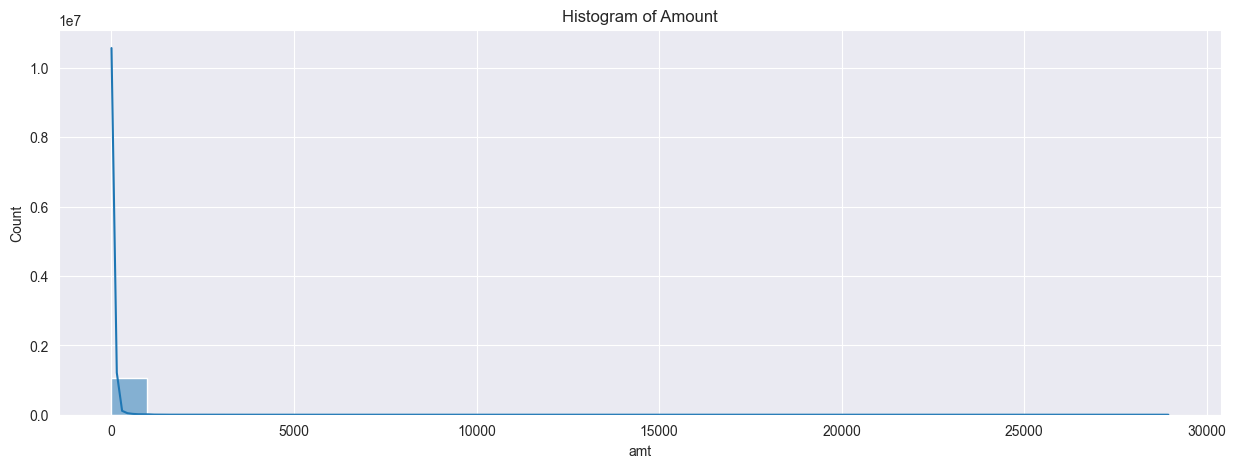

In [8]:
# histplot for Amount
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title("Histogram of Amount")
sns.histplot(data["amt"], bins=30, kde=True, ax=ax)


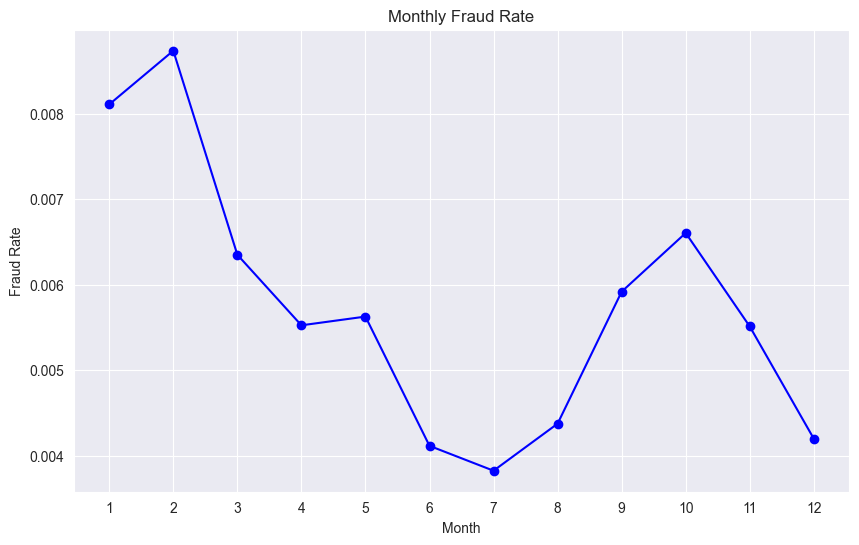

In [9]:
# Convert 'trans_date_trans_time' to datetime format
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

# Extract month from 'trans_date_trans_time'
data['month'] = data['trans_date_trans_time'].dt.month

# Group by month and calculate the fraud rate
monthly_fraud_rate = data.groupby('month')['is_fraud'].mean().reset_index()

# Plotting the monthly fraud rate
plt.figure(figsize=(10, 6))
plt.plot(monthly_fraud_rate['month'], monthly_fraud_rate['is_fraud'], marker='o', color='b')
plt.title('Monthly Fraud Rate')
plt.xlabel('Month')
plt.ylabel('Fraud Rate')
plt.xticks(range(1, 13))  # Setting x-ticks to represent each month
plt.grid(True)
plt.show()

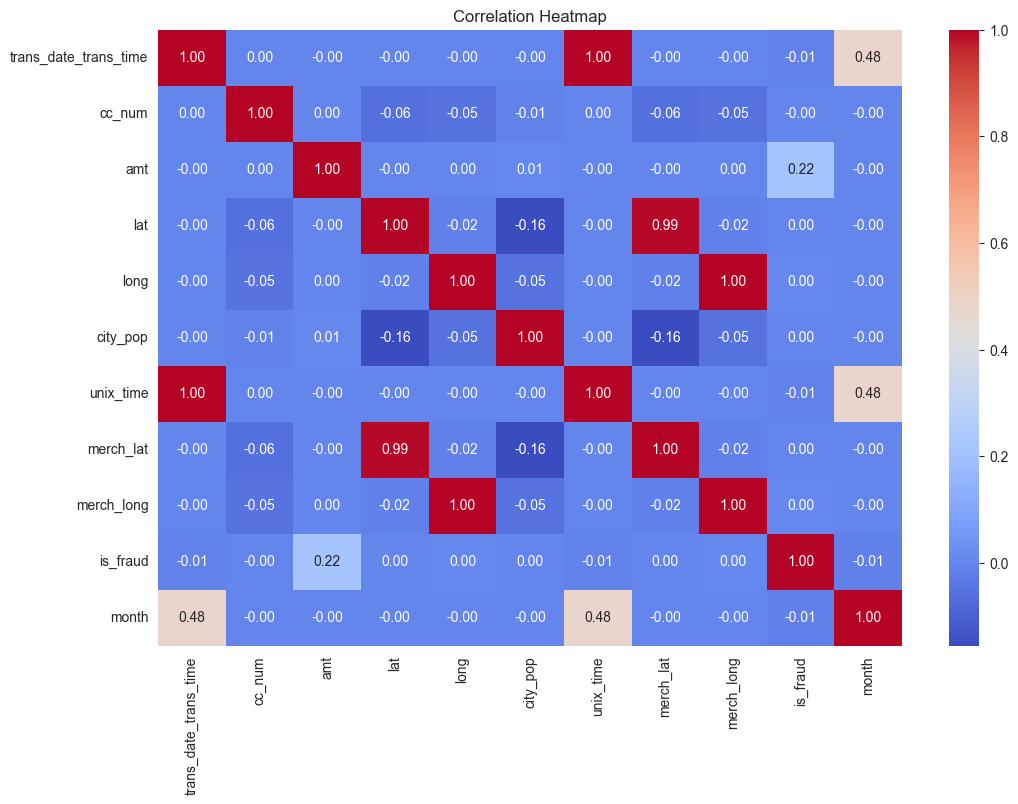

In [10]:
# Drop non-numeric columns
numeric_data = data.drop(['Unnamed: 0', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num'], axis=1)

# Calculating the correlation matrix
correlation_matrix = numeric_data.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [11]:

data['month'] = data['trans_date_trans_time'].dt.month
data['day_of_week'] = data['trans_date_trans_time'].dt.dayofweek
data['hour'] = data['trans_date_trans_time'].dt.hour

# Drop unnecessary columns
data = data.drop(['Unnamed: 0', 'trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num'], axis=1)

# Encode categorical variables if any
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])

# Split data into features and target variable
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest classifier with reduced number of estimators
clf = RandomForestClassifier(n_estimators=50, random_state=42)  # Reduced from 100 to 50
clf.fit(X_train, y_train)

# Predictions
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Classification report
print("Classification Report (Test Data):\n", classification_report(y_test, y_pred_test))


Train Accuracy: 0.9999845027591049
Test Accuracy: 0.996862408506783
Classification Report (Test Data):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    208551
           1       0.88      0.50      0.64      1164

    accuracy                           1.00    209715
   macro avg       0.94      0.75      0.82    209715
weighted avg       1.00      1.00      1.00    209715


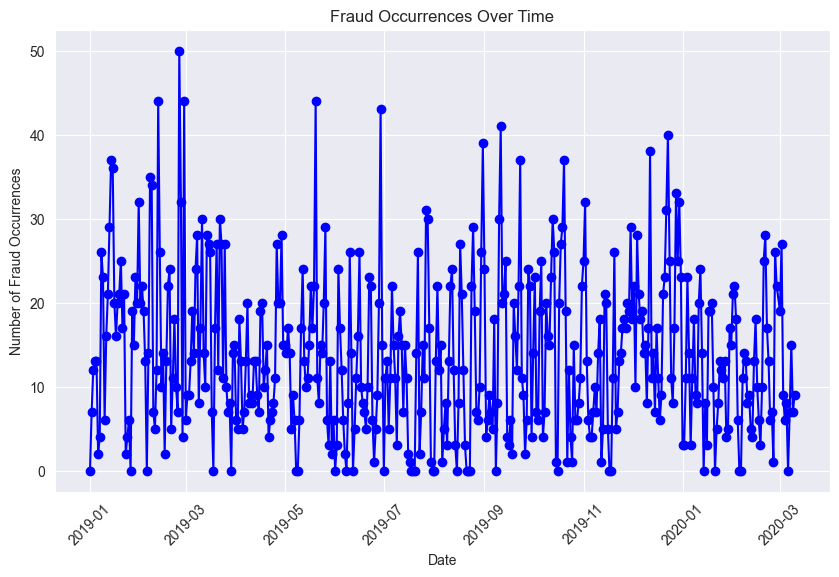

In [12]:

data = pd.read_csv("fraudTrain.csv")

data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
# Group by date and count the number of fraud occurrences
fraud_counts_by_date = data.groupby(data['trans_date_trans_time'].dt.date)['is_fraud'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(fraud_counts_by_date['trans_date_trans_time'], fraud_counts_by_date['is_fraud'], marker='o', color='b')
plt.title('Fraud Occurrences Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Fraud Occurrences')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


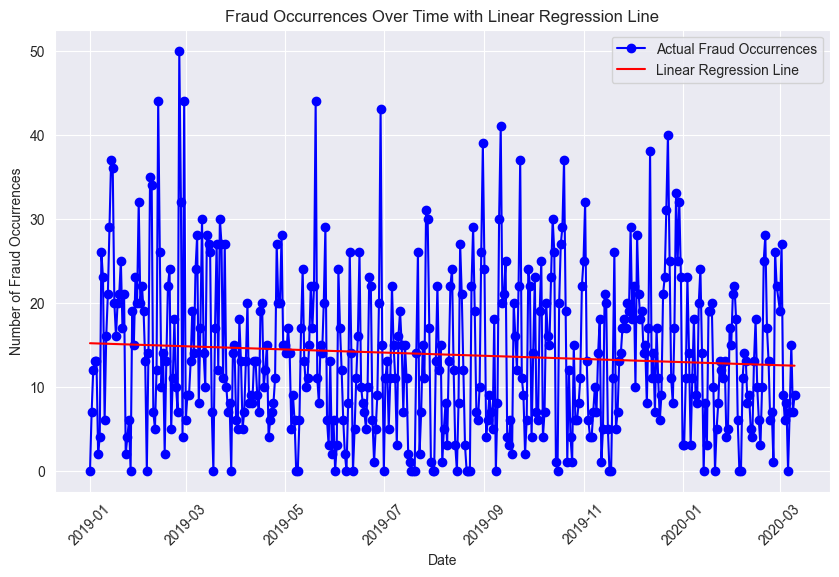

In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Convert date to ordinal for linear regression
fraud_counts_by_date['ordinal_date'] = fraud_counts_by_date['trans_date_trans_time'].apply(lambda x: x.toordinal())

# Perform linear regression
regression = LinearRegression()
regression.fit(np.array(fraud_counts_by_date['ordinal_date']).reshape(-1, 1), fraud_counts_by_date['is_fraud'])

# Predict fraud occurrences using the linear regression model
fraud_counts_by_date['predicted_fraud'] = regression.predict(np.array(fraud_counts_by_date['ordinal_date']).reshape(-1, 1))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(fraud_counts_by_date['trans_date_trans_time'], fraud_counts_by_date['is_fraud'], marker='o', color='b', label='Actual Fraud Occurrences')
plt.plot(fraud_counts_by_date['trans_date_trans_time'], fraud_counts_by_date['predicted_fraud'], color='r', label='Linear Regression Line')
plt.title('Fraud Occurrences Over Time with Linear Regression Line')
plt.xlabel('Date')
plt.ylabel('Number of Fraud Occurrences')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.show()


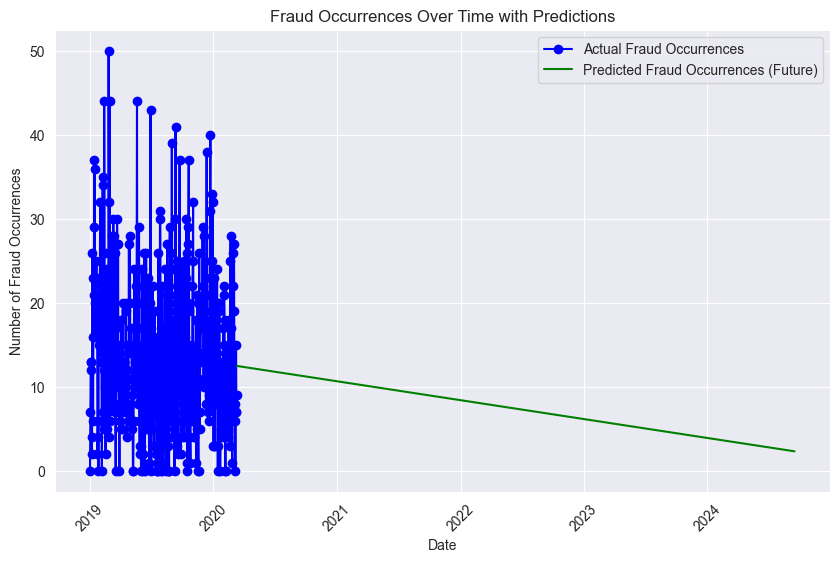

In [14]:
import datetime

# Define the number of future days to predict
future_days = 1650

# Create future dates
last_date = fraud_counts_by_date['trans_date_trans_time'].max()
future_dates = [last_date + datetime.timedelta(days=i) for i in range(1, future_days + 1)]

# Convert future dates to ordinal
future_dates_ord = [date.toordinal() for date in future_dates]

# Predict future fraud occurrences using the linear regression model
future_predictions = regression.predict(np.array(future_dates_ord).reshape(-1, 1))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(fraud_counts_by_date['trans_date_trans_time'], fraud_counts_by_date['is_fraud'], marker='o', color='b', label='Actual Fraud Occurrences')
plt.plot(future_dates, future_predictions, color='g', label='Predicted Fraud Occurrences (Future)')
plt.title('Fraud Occurrences Over Time with Predictions')
plt.xlabel('Date')
plt.ylabel('Number of Fraud Occurrences')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.show()


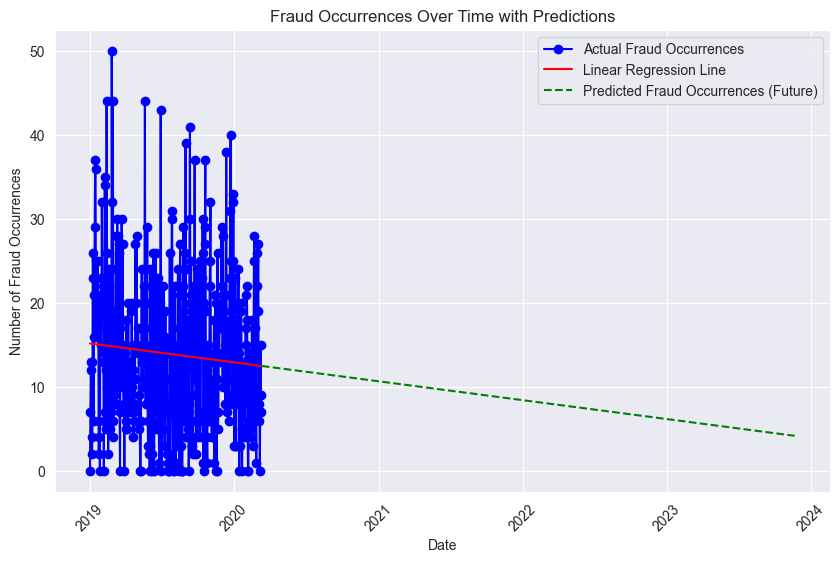

In [15]:
import datetime

# Convert date to ordinal for linear regression
fraud_counts_by_date['ordinal_date'] = fraud_counts_by_date['trans_date_trans_time'].apply(lambda x: x.toordinal())

# Perform linear regression
regression = LinearRegression()
regression.fit(np.array(fraud_counts_by_date['ordinal_date']).reshape(-1, 1), fraud_counts_by_date['is_fraud'])

# Predict fraud occurrences using the linear regression model
fraud_counts_by_date['predicted_fraud'] = regression.predict(np.array(fraud_counts_by_date['ordinal_date']).reshape(-1, 1))

# Define the number of future days to predict
future_days = 1350

# Create future dates
last_date = fraud_counts_by_date['trans_date_trans_time'].max()
future_dates = [last_date + datetime.timedelta(days=i) for i in range(1, future_days + 1)]

# Convert future dates to ordinal
future_dates_ord = [date.toordinal() for date in future_dates]

# Predict future fraud occurrences using the linear regression model
future_predictions = regression.predict(np.array(future_dates_ord).reshape(-1, 1))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(fraud_counts_by_date['trans_date_trans_time'], fraud_counts_by_date['is_fraud'], marker='o', color='b', label='Actual Fraud Occurrences')
plt.plot(fraud_counts_by_date['trans_date_trans_time'], fraud_counts_by_date['predicted_fraud'], color='r', label='Linear Regression Line')
plt.plot(future_dates, future_predictions, color='g', linestyle='--', label='Predicted Fraud Occurrences (Future)')
plt.title('Fraud Occurrences Over Time with Predictions')
plt.xlabel('Date')
plt.ylabel('Number of Fraud Occurrences')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.show()